In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("base_earnings.csv", index_col = 'Unnamed: 0')
df.Date = pd.to_datetime(df.Date)
#.dt.strftime('%Y-%d-%m')
df.Name = df.Name.str.replace('/d','')
df.Name = df.Name.str.replace(' /d','')

"""df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.week
df['day'] = df['Date'].dt.day"""

df = df.drop(columns= {'RIC', 'mean_estimate'})
#df = df.drop(columns= {'Date', 'Industry', 'Sub-sector', 'Sector'})
df.head()

,Date,revenue,pred_surprise,GDP,Name,Sector,Sub-sector,Industry
1,2008-01-04,1448.000000,-0.123,15752.308,AGILENT TECH,Manufacturing,Computer and Electronic Product Manufacturing,"Navigational, Measuring, Electromedical, and C..."
2,2005-01-10,1194.000000,-0.148,15066.597,AGILENT TECH,Manufacturing,Computer and Electronic Product Manufacturing,"Navigational, Measuring, Electromedical, and C..."
3,2017-01-04,1110.000000,0.003,17995.150,AGILENT TECH,Manufacturing,Computer and Electronic Product Manufacturing,"Navigational, Measuring, Electromedical, and C..."
4,2003-01-01,1448.666667,-0.140,13634.253,AGILENT TECH,Manufacturing,Computer and Electronic Product Manufacturing,"Navigational, Measuring, Electromedical, and C..."
5,2012-01-07,1752.333333,0.129,16220.667,AGILENT TECH,Manufacturing,Computer and Electronic Product Manufacturing,"Navigational, Measuring, Electromedical, and C..."


# Filter by sector/company

In [161]:
pd.value_counts(df.Sector).to_frame().reset_index()

,index,Sector
0,Manufacturing,38670
1,Finance and Insurance,7373
2,"Professional, Scientific, and Technical Services",5865
3,Real Estate and Rental and Leasing,5699
4,Retail Trade,5473
5,Information,5376
6,"Mining, Quarrying, and Oil and Gas Extraction",4099
7,Utilities,3627
8,Transportation and Warehousing,3245
9,Wholesale Trade,2562


In [162]:
pd.value_counts(df['Sub-sector']).to_frame().reset_index()

,index,Sub-sector
0,Computer and Electronic Product Manufacturing,11209
1,Chemical Manufacturing,6093
2,"Professional, Scientific, and Technical Services",5865
3,Real Estate,5410
4,Insurance Carriers and Related Activities,4031
...,...,...
67,Miscellaneous Store Retailers,115
68,Repair and Maintenance,113
69,Animal Production,93
70,Nursing and Residential Care Facilities,91


In [163]:
df_filter = df.loc[df.Date > '2010-01-01']
a = df_filter.loc[df_filter.Name == 'LEGGETT& PLATT'].sort_values('pred_surprise', ascending=False)

In [164]:
df_filter = df.loc[df.Date > '2010-01-01']
group1 = df_filter.groupby(['Name','Sector', 'Sub-sector'])[['pred_surprise']].agg(np.mean)
group1 = group1.loc[(group1.pred_surprise < -5) | (group1.pred_surprise > 5)]
group1 = group1.sort_values('pred_surprise')
group1.reset_index(inplace=True)
group1

,Name,Sector,Sub-sector,pred_surprise
0,QUALYS INC,"Professional, Scientific, and Technical Services","Professional, Scientific, and Technical Services",-23.238138
1,CAL-MAINE FOOD,"Agriculture, Forestry, Fishing and Hunting",Animal Production,-13.641853
2,ENANTA PHARMAC,Manufacturing,Chemical Manufacturing,-8.756000
3,SHAKE SHACK IN,Accommodation and Food Services,Food Services and Drinking Places,-7.329185
4,ENDO INTERNATI,Manufacturing,Chemical Manufacturing,-6.595000
5,JOHN BEAN TEC,Manufacturing,Machinery Manufacturing,-6.403088
6,OIL STATES INT,Manufacturing,Machinery Manufacturing,-5.924765
7,GARRET MOTIN I,Manufacturing,Transportation Equipment Manufacturing,-5.019429
8,LEGGETT& PLATT,Manufacturing,Furniture and Related Product Manufacturing,21.474824


In [210]:
df_reg = df.loc[df.Name.isin(group1.Name)]
df_reg = df_reg.drop(columns= {'Sub-sector', 'Industry', 'pred_surprise','Sector'})

CALMAINEFOOD = df_reg.copy()
CALMAINEFOOD = CALMAINEFOOD.loc[CALMAINEFOOD.Name == "ENDO INTERNATI"]
CALMAINEFOOD = CALMAINEFOOD.sort_values('Date')
CALMAINEFOOD['GDP_var'] = CALMAINEFOOD['GDP'].pct_change(1)
CALMAINEFOOD['revenue_var'] = CALMAINEFOOD['revenue'].pct_change(1)
CALMAINEFOOD = CALMAINEFOOD.drop(columns= {'Date', 'GDP', 'revenue', 'Name'})
CALMAINEFOOD.dropna(inplace= True)
CALMAINEFOOD.reset_index(inplace= True, drop= True)
CALMAINEFOOD.head()

,GDP_var,revenue_var
0,0.007692,-0.085291
1,0.013097,0.248230
2,0.016996,0.571604
3,0.003618,-0.473171
4,0.018312,0.553111


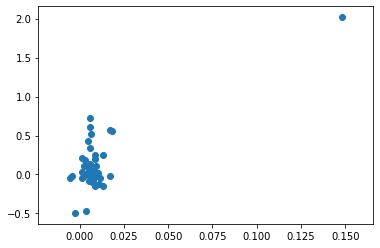

In [207]:
plt.scatter(CALMAINEFOOD.GDP_var, CALMAINEFOOD.revenue_var)

In [208]:
df_reg

,Date,revenue,GDP,Name
14619,1997-01-01,75.994333,11284.587,CAL-MAINE FOOD
14620,2006-01-04,124.705333,15302.705,CAL-MAINE FOOD
14621,2015-01-01,426.041000,17254.744,CAL-MAINE FOOD
14622,2017-01-04,270.671000,17995.150,CAL-MAINE FOOD
14623,2008-01-07,217.363333,15667.032,CAL-MAINE FOOD
...,...,...,...,...
73116,2012-01-10,15.217000,16239.138,SHAKE SHACK IN
73117,2013-01-04,20.952000,16403.180,SHAKE SHACK IN
73118,2012-01-04,13.936000,16198.807,SHAKE SHACK IN
73119,2012-01-01,11.815000,16129.418,SHAKE SHACK IN


In [172]:
X= df_reg.drop(['revenue'],axis=1,inplace=False)
y= df_reg.revenue
X

,GDP,Name
14619,11284.587,CAL-MAINE FOOD
14620,15302.705,CAL-MAINE FOOD
14621,17254.744,CAL-MAINE FOOD
14622,17995.150,CAL-MAINE FOOD
14623,15667.032,CAL-MAINE FOOD
...,...,...
73116,16239.138,SHAKE SHACK IN
73117,16403.180,SHAKE SHACK IN
73118,16198.807,SHAKE SHACK IN
73119,16129.418,SHAKE SHACK IN


In [173]:
num_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
scaler=StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [174]:
X = pd.get_dummies(X,drop_first=True)
X

,GDP,Name_ENANTA PHARMAC,Name_ENDO INTERNATI,Name_GARRET MOTIN I,Name_JOHN BEAN TEC,Name_LEGGETT& PLATT,Name_OIL STATES INT,Name_QUALYS INC,Name_SHAKE SHACK IN
14619,-1.804265,0,0,0,0,0,0,0,0
14620,-0.033217,0,0,0,0,0,0,0,0
14621,0.827174,0,0,0,0,0,0,0,0
14622,1.153520,0,0,0,0,0,0,0,0
14623,0.127366,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
73116,0.379530,0,0,0,0,0,0,0,1
73117,0.451834,0,0,0,0,0,0,0,1
73118,0.361754,0,0,0,0,0,0,0,1
73119,0.331169,0,0,0,0,0,0,0,1


In [158]:
X.shape

(465, 7)

In [159]:
y.shape
df_reg['GDP_var']

(465,)

# ML

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [141]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)
model.predict(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 775.         483.733      331.1103333    2.16       273.3
  355.909      438.245     1091.5        809.9        234.474
  113.491      405.          13.004      620.         358.469
  395.4        295.4         96.136      499.308      594.532
  281.9616667  211.5263333  875.5        137.754      528.715
   19.375      150.839      201.5        205.3        837.7
   32.302      153.489      747.         459.607      214.4
  175.849      271.2093333   51.25       915.          59.49
  290.271      169.655      110.554      177.17       169.
  328.8        409.2        492.1        978.1        204.7
  143.968      173.51       998.3        160.815      260.2
  337.359      173.4313333  270.671       74.567       14.416
 1187.2        285.845      107.902      968.5       1039.7
  230.3        216.5       1338.         456.334       76.749
   16.07       169.934      240.789      245.241      386.0546667
  366.7026667   55.302      248.879     1348.6         94.609
   88.227      859.2       1121.2         24.883    ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
regression

In [123]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score 


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix
from sklearn import ensemble, linear_model, neighbors, svm, tree
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process


In [ ]:
import seaborn as sns
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X.iloc[:,:7].head().corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
MLA = [
    #Nearest Neighbor
    neighbors.KNeighborsRegressor(),
    #SVM
    svm.SVR(),
    svm.LinearSVR(),
    #Trees    
    tree.DecisionTreeRegressor(),
    #tree.ExtraTreeClassifier(),
    #Linear
    LinearRegression()
    ]

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    print(alg)
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    print("Done")
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare


#Plot 
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()